## Black Friday Dataset EDA And Feature Engineering
### Cleaning and preparing the data for model training

In [1]:
## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\users\somil jain\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
## importing the dataset
df_train=pd.read_csv('blackFriday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
##  import the test data
df_test=pd.read_csv('blackFriday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
# Merge both train and test data
df = pd.concat([df_train, df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df_backup = df.copy()  # Create a backup

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
print(df['Gender'].isna().sum())

0


In [8]:
##HAndling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
## Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
##fixing categorical City_categort
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [15]:
df=pd.concat([df,df_city],axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [16]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

In [17]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,1000001,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,1000001,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,1000002,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True


In [19]:
# Missing Values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [30]:
# Focus on replacing the missing values
# For Category 2
df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [23]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [26]:
df['Product_Category_2'].mode()[0]

8.0

In [27]:
## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [29]:
df['Product_Category_2'].isnull().sum()

0

In [31]:
# Focus on replacing the missing values
# For Category 3
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [32]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [33]:
df['Product_Category_3'].mode()[0]

16.0

In [34]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [35]:
df['Product_Category_3'].isnull().sum()

0

In [36]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [37]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [38]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,1000001,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,1000001,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,1000002,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,False,True


In [39]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  bool   
 12  C                           783667 non-null  bool   
dtypes: bool(2), float64

In [40]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3), int3

In [42]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


<Axes: xlabel='Age', ylabel='Purchase'>

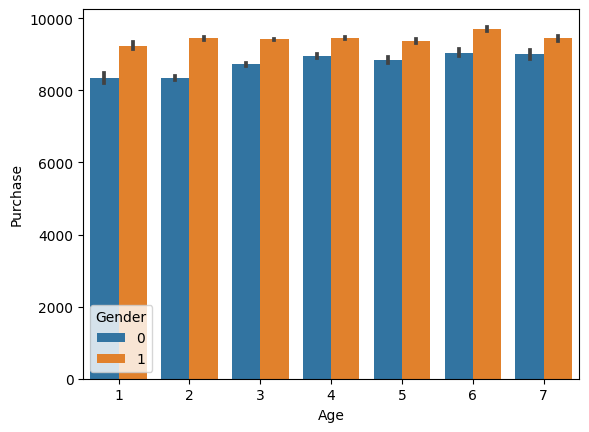

In [46]:
##Visualisation Age vs Purchased
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

Purchasing of men is high then women

<Axes: xlabel='Occupation', ylabel='Purchase'>

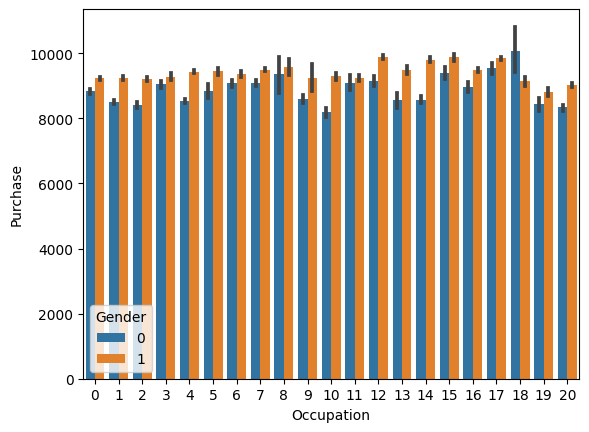

In [48]:
## Visualization of Purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

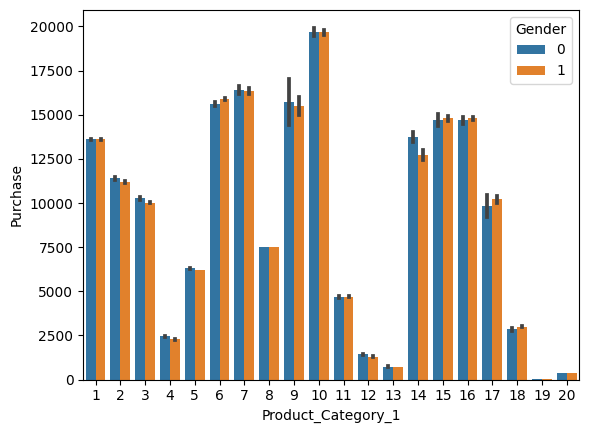

In [49]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

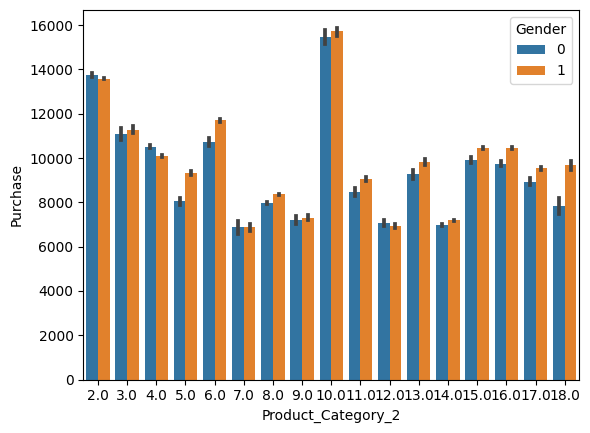

In [50]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

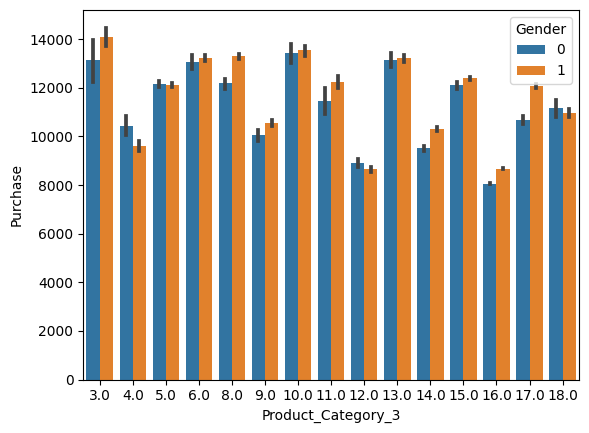

In [51]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

## Feature SCaling

In [55]:
df['Purchase'].isnull().sum()

233599

In [75]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [76]:
df_test=df[df['Purchase'].isnull()]

In [77]:
df_train=df[~df['Purchase'].isnull()]

In [91]:
X=df_train.drop('Purchase',axis=1)

In [92]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [93]:
X.shape

(550068, 11)

In [94]:
y=df_train['Purchase']

In [95]:
y.shape

(550068,)

In [88]:
import sklearn
print (sklearn.__version__)

1.5.1


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [98]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [99]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
## train ur model